## Applying HC to multi flow pattern study

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# import data
data = pd.read_csv('BDOShoham.csv')

#Prepare predictors and response columns

x = pd.DataFrame(data, columns=['Vsl', 'Vsg', 'VisL', 'VisG', 'DenL', 'DenG', 'ST', 'Ang', 'ID'])

# generate the linkage matrix
Z = linkage(x, 'single')

#c, coph_dists = cophenet(Z, pdist(x))
#c

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
           Z,
           leaf_rotation=90.,  # rotates the x axis labels
           leaf_font_size=8.,  # font size for the x axis labels
           )
plt.show()

<Figure size 2500x1000 with 1 Axes>

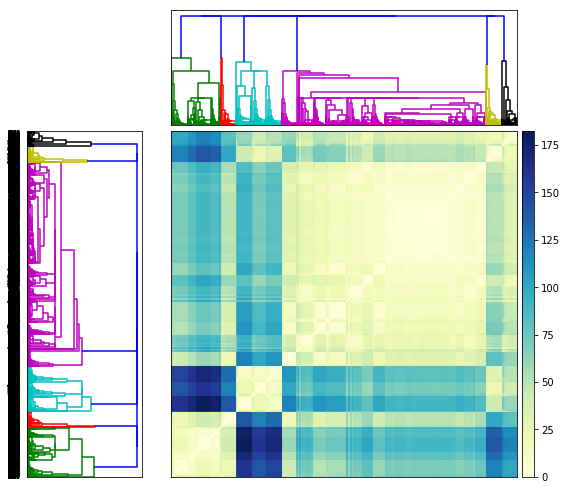

In [2]:
data_dist = pdist(x)
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='single')
Z1 = dendrogram(Y, orientation='right') # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

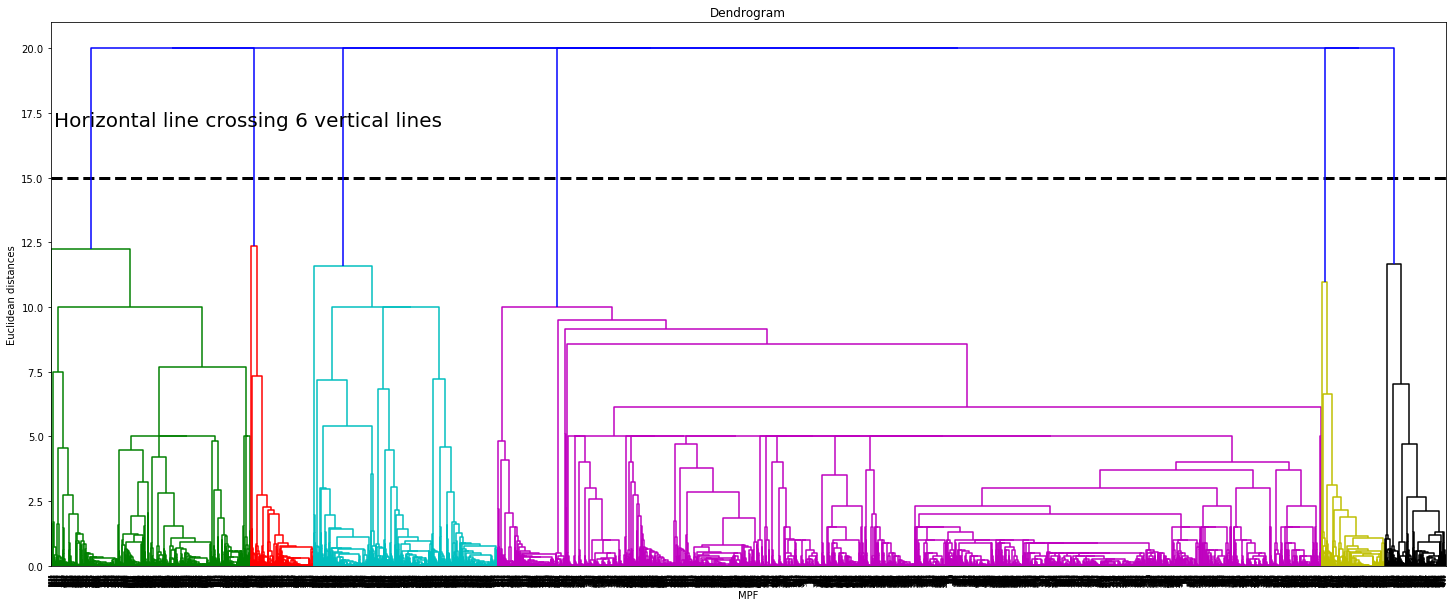

In [3]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,10))
plt.title('Dendrogram')
plt.xlabel('MPF')
plt.ylabel('Euclidean distances')
plt.hlines(y=15,xmin=0,xmax=150000,lw=3,linestyles='--')
plt.text(x=150,y=17,s='Horizontal line crossing 6 vertical lines',fontsize=20)
dendrogram = sch.dendrogram(sch.linkage(x, method = 'single'))
plt.show()